<a href="https://colab.research.google.com/github/young-hwanlee/my-practical-statistics-for-data-scientists/blob/main/Chapter_3_Statistical_Experiments_and_Significance_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical Statistics for Data Scientists (Python)**
# **Chapter 3 - Statistical Experiments and Significance Testing**
> (c) 2019 Peter C. Bruce, Andrew Bruce, and Peter Gedeck

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# try:
#     import common
#     DATA = common.dataDirectory()
# except ImportError:
#     DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
# WEB_PAGE_DATA_CSV = DATA / 'web_page_data.csv'
# FOUR_SESSIONS_CSV = DATA / 'four_sessions.csv'
# CLICK_RATE_CSV = DATA / 'click_rates.csv'
# IMANISHI_CSV = DATA / 'imanishi_data.csv'

DATA = 'https://raw.githubusercontent.com/young-hwanlee/practical-statistics-for-data-scientists/master/data/'

WEB_PAGE_DATA_CSV = DATA + 'web_page_data.csv'
FOUR_SESSIONS_CSV = DATA + 'four_sessions.csv'
CLICK_RATE_CSV = DATA + 'click_rates.csv'
IMANISHI_CSV = DATA + 'imanishi_data.csv'

## **3.3 Resampling**

In [4]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
print(session_times.shape)
session_times.head(5)

(36, 2)


,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [5]:
session_times.Time = 100 * session_times.Time
session_times.head(5)

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


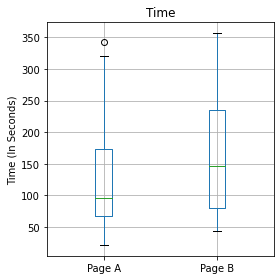

In [6]:
ax = session_times.boxplot(by='Page', column='Time', figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (In Seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [7]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print('Mean of Page B: ', mean_b, '\nMean of Page A: ', mean_a)
print(mean_b - mean_a)

Mean of Page B:  162.0 
Mean of Page A:  126.33333333333333
35.66666666666667


In [8]:
print(len(session_times[session_times.Page == 'Page A']),
      len(session_times[session_times.Page == 'Page B']))

21 15


The following code is different to the R version. idx_A and idx_B are reversed.

In [9]:
for _ in range(5):
    print(random.sample(range(5),2))

[2, 4]
[4, 2]
[4, 0]
[1, 4]
[2, 4]


In [10]:
for _ in range(5):
    print(set(random.sample(range(5), 3)))

{0, 2, 3}
{0, 2, 4}
{0, 1, 3}
{1, 2, 4}
{0, 1, 4}


In [11]:
# Permutation test example with stickiness
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

42.86666666666666


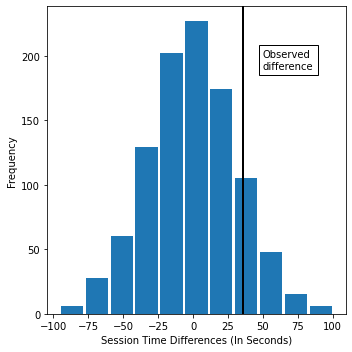

In [12]:
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session Time Differences (In Seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
perm_diffs[:5]

[6.523809523809518,
 -17.59047619047618,
 22.866666666666674,
 -6.161904761904765,
 10.29523809523809]

In [14]:
[mean_b - mean_a]

[35.66666666666667]

In [15]:
np.array(perm_diffs) > mean_b - mean_a

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [16]:
np.where(np.array(perm_diffs) > mean_b - mean_a)[0]

array([ 12,  13,  17,  25,  26,  39,  78,  82,  85, 108, 125, 150, 170,
       177, 182, 189, 192, 194, 196, 199, 200, 201, 202, 208, 213, 224,
       230, 249, 251, 253, 259, 263, 265, 266, 268, 277, 296, 309, 313,
       317, 324, 337, 344, 362, 372, 373, 377, 388, 391, 410, 426, 430,
       451, 454, 456, 458, 459, 463, 487, 513, 536, 537, 542, 554, 571,
       587, 590, 593, 594, 599, 603, 627, 632, 649, 671, 673, 687, 693,
       701, 702, 703, 725, 740, 750, 755, 757, 790, 792, 793, 799, 802,
       804, 816, 819, 831, 834, 836, 837, 840, 856, 866, 888, 891, 896,
       897, 898, 900, 903, 912, 914, 923, 928, 931, 933, 939, 970, 974,
       982, 992, 995, 999])

In [17]:
type(perm_diffs)

list

In [18]:
type(pd.DataFrame(perm_diffs))

pandas.core.frame.DataFrame

In [19]:
pd.DataFrame(perm_diffs).T[np.where(np.array(perm_diffs) > mean_b - mean_a)[0]]

,12,13,17,25,26,39,78,82,85,108,125,150,170,177,182,189,192,194,196,199,200,201,202,208,213,224,230,249,251,253,259,263,265,266,268,277,296,309,313,317,...,725,740,750,755,757,790,792,793,799,802,804,816,819,831,834,836,837,840,856,866,888,891,896,897,898,900,903,912,914,923,928,931,933,939,970,974,982,992,995,999
0,53.266667,39.552381,48.809524,55.895238,42.980952,48.12381,37.609524,40.009524,48.809524,39.780952,41.72381,46.180952,60.12381,69.609524,46.066667,64.466667,41.495238,37.952381,40.12381,51.32381,65.038095,43.095238,38.638095,38.752381,36.809524,86.295238,95.32381,36.580952,58.980952,44.580952,60.580952,62.866667,42.409524,43.895238,37.380952,36.12381,68.809524,38.180952,76.92381,54.866667,...,37.038095,44.695238,57.495238,55.552381,74.295238,57.72381,44.352381,57.952381,74.066667,37.72381,42.066667,47.780952,50.409524,79.895238,36.695238,45.952381,39.095238,37.038095,40.580952,100.352381,52.009524,70.180952,44.352381,50.866667,49.495238,39.780952,55.095238,49.609524,40.009524,41.952381,73.838095,49.609524,37.152381,37.72381,35.780952,48.238095,38.638095,53.838095,36.695238,62.638095


In [20]:
print(np.mean(pd.DataFrame(perm_diffs).T[np.where(np.array(perm_diffs) > mean_b - mean_a)[0]],axis=1))

0    52.482723
dtype: float64


In [21]:
# print(np.mean(perm_diffs > mean_b - mean_a))    # -> not working

In [22]:
print(np.mean([diff > mean_b - mean_a for diff in perm_diffs]))

0.121


## **3.4 Statistical Significance and P-Value**



In [23]:
382 / (45945 + 382)

0.008245731430915016

In [24]:
random.seed(1)
obs_pct_diff = 100 * (200 / (23539+200) - 182 / (22406+182))
print(f'Observed difference: {obs_pct_diff:.4f}%')

conversion = [0] * 45945
conversion.extend([1] * 382)
type(conversion)

Observed difference: 0.0368%


list

In [25]:
conversion = pd.Series(conversion)
type(conversion)

pandas.core.series.Series

In [26]:
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]
perm_diffs

[-0.06267673224219054,
 -0.019478698206194106,
 0.023719335829802332,
 0.17923225835938977,
 -0.02811830501339343,
 -0.22682926157897723,
 -0.06267673224219054,
 -0.0453975186277919,
 -0.12315397989258554,
 0.023719335829802332,
 -0.019478698206194106,
 -0.07131633904938986,
 -0.019478698206194106,
 -0.0021994845917954614,
 0.006440122215403861,
 0.11011540390179539,
 0.13603422432339335,
 0.015079729022603183,
 0.13603422432339335,
 0.0496381562514003,
 -0.05403712543499122,
 -0.010839091398994784,
 -0.010839091398994784,
 -0.12315397989258554,
 0.015079729022603183,
 0.07555697667299827,
 -0.1404331935069842,
 -0.010839091398994784,
 -0.05403712543499122,
 -0.10587476627818707,
 -0.0021994845917954614,
 0.04099854944420098,
 0.006440122215403861,
 0.0841965834801976,
 0.0841965834801976,
 0.006440122215403861,
 -0.0021994845917954614,
 0.10147579709459614,
 -0.019478698206194106,
 -0.1836312275429806,
 0.032358942637001654,
 -0.03675791182059275,
 -0.05403712543499122,
 -0.0453975186

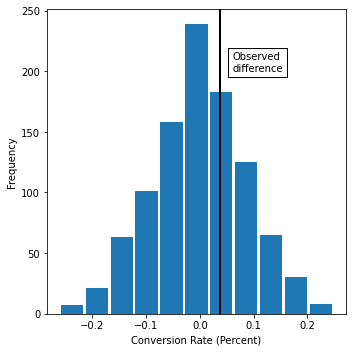

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion Rate (Percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **3.4.1 P-Value**

If np.mean is applied to a list of booleans, it gives the percentage of how often True was found in the list (#True / #Total).

In [28]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


In [29]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


https://link.springer.com/content/pdf/10.1007/s00144-008-0033-3.pdf

## **3.5 t-Tests**

In [30]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [31]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time,
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


## **3.8 ANOVA (ANalysis Of VAriance)**

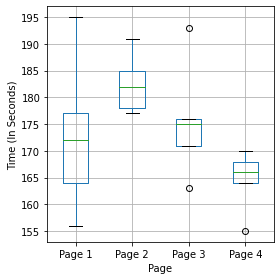

In [32]:
four_sessions = pd.read_csv(FOUR_SESSIONS_CSV)

ax = four_sessions.boxplot(by='Page', column='Time', figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (In Seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [33]:
print(pd.read_csv(FOUR_SESSIONS_CSV).head())

     Page  Time
0  Page 1   164
1  Page 2   178
2  Page 3   175
3  Page 4   155
4  Page 1   172


In [34]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed mean:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

print(perm_test(four_sessions))

Observed mean: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
50.706666666666685


Pr(Prov) 0.081


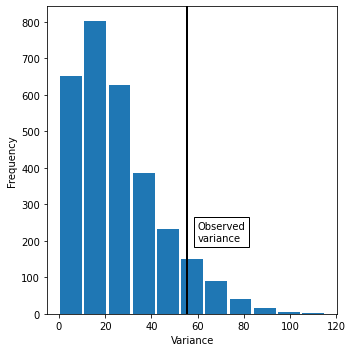

In [35]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prov)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x=observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **3.8.1 F-Statistic**

We can compute an ANOVA table using *statsmodels*.

In [36]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()

aov_table = sm.stats.anova_Im(model)
print(aov_table)

AttributeError: ignored

In [ ]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

### **3.8.2 Two-Way ANOVA**
### **Two-way ANOVA is only available with statsmodels**  
> formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'  
> model = ols(formula, data).fit()  
> aov_table = anova_lm(model, typ=2)

## **3.9 Chi-Square Test**
### **3.9.1 Chi-Square Test: A Resampling Approach**

In [ ]:
# Table 3-4
click_rate = pd.read_csv(CLICK_RATE_CSV)
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

In [ ]:
# Table 3-5
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

In [ ]:
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])

    # Return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

In [ ]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

### **3.9.2 Figure Chi-Square Distribution**

In [ ]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})

fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label = '10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label = '20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

### **3.9.3 Fisher's Exact Test**

*Scipy* has only an implementation of Fisher's Exact Test for 2x2 matrices. There is a github repository that provides a Python implementation that uses the same code as the R version. Installing this requires a Fortran compiler.  
> stat.fisher_exact(clicks)

In [ ]:
# stats.fisher_exact(clicks.values)

### **Scientific Fraud**

In [ ]:
imanishi = pd.read_csv(IMANISHI_CSV)
imanishi.columns = [c.strip() for c in imanishi.columns]
ax = imanishi.plot.bar(x='Digit', y=['Frequency'], legend=False, figsize=(4, 4))
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **3.11 Power and Sample Size**

*Statsmodels* has a number of methods for power calculation.  
See e.g.: https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

In [ ]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)